Import Libraries

In [ ]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# specific imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

Import Dataset

In [ ]:
# Assign data to variable
dataset = pd.read_csv('HousingData.csv')
dataset = dataset.head(229)

# Take a small look at the dataframe produced
print(dataset.head())
print(dataset.shape)

       Date  Composite_HPI  Single_Family_HPI  One_Storey_HPI  Two_Storey_HPI  \
0  Jan 2005          100.0              100.0           100.0           100.0   
1  Feb 2005          101.0              101.0           101.2           100.9   
2  Mar 2005          102.1              102.1           102.4           101.9   
3  Apr 2005          103.1              103.2           103.8           102.9   
4  May 2005          103.8              103.8           104.6           103.4   

   Townhouse_HPI  Apartment_HPI  Composite_Benchmark  Single_Family_Benchmark  \
0          100.0          100.0             237700.0                 257600.0   
1          100.9          101.3             240100.0                 260100.0   
2          101.7          102.3             242600.0                 263000.0   
3          102.5          103.1             245100.0                 265800.0   
4          103.2          104.1             246700.0                 267500.0   

   One_Storey_Benchmark  T

Preprocess Data (normalize it!)

In [ ]:
# Convert the date strings into datetime objects
dataset['Date'] = pd.to_datetime(dataset['Date'])

Split data into X and y sets

In [ ]:
# define X and y variables
X = dataset[[
    'Composite_HPI',
    'Single_Family_Benchmark',
    'One_Storey_Benchmark',
    'Two_Storey_Benchmark',
    'Townhouse_Benchmark',
    'Apartment_Benchmark'
    ]]
y = dataset[
    'Composite_Benchmark'
    ]

# varify the split data
print(f"X dataset example: {X}")
print(f"y dataset example: {y}")

X dataset example:      Composite_HPI  Single_Family_Benchmark  One_Storey_Benchmark  \
0            100.0                 257600.0              205000.0   
1            101.0                 260100.0              207400.0   
2            102.1                 263000.0              210000.0   
3            103.1                 265800.0              212700.0   
4            103.8                 267500.0              214500.0   
..             ...                      ...                   ...   
224          311.9                 815300.0              626200.0   
225          307.6                 802200.0              618200.0   
226          302.5                 788200.0              606300.0   
227          298.8                 779100.0              598600.0   
228          297.8                 776300.0              597800.0   

     Two_Storey_Benchmark  Townhouse_Benchmark  Apartment_Benchmark  
0                300000.0             199600.0             172400.0  
1           

Break data into Training and Test sets

In [ ]:
# Split into 4 specific variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setup hyperparameters

In [ ]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200]
}

Instatiate the model

In [ ]:
# plant the seeds to grow a forest
forest_model = RandomForestRegressor(random_state=0)

# Initiate the random search
random_search = RandomizedSearchCV(
    estimator = forest_model,  # use the model we created above
    param_distributions = param_dist,  # use the params we defined above
    n_iter = 15,  # Go over it 10 times
    cv = 5,  # Cross validation iterations
    scoring = 'neg_mean_squared_error',  # score output for performance
    random_state = 0
    )

Train the model

In [ ]:
# Not tuned fit
forest_model.fit(X_train, y_train)

# call your model and pass in the training datasets
random_search.fit(X_train, y_train)  # Use the random_search now instead of forest object

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=15,
                   param_distributions={'n_estimators': [50, 100, 150, 200]},
                   random_state=0, scoring='neg_mean_squared_error')

Make the predictions you want it to output

In [ ]:
# pass in X_test to predict a y value on forest model
y_predict = forest_model.predict(X_test)

print(f"Not Tuned: {y_predict}")

# Predict on the tuned model
tuned_pred = random_search.predict(X_test)

print(f"Tuned Predicition: {tuned_pred}")


Not Tuned: [705388. 335518. 254518. 595919. 271312. 695601. 297031. 681523. 544252.
 434100. 719617. 288173. 365141. 527562. 757081. 509602. 564637. 315523.
 744558. 547313. 380374. 546812. 756147. 533693. 430256. 284273. 572798.
 378761. 380179. 363323. 694114. 326685. 401831. 311097. 282660. 438490.
 553013. 401057. 359562. 527512. 367784. 525590. 512719. 339292. 399752.
 398923.]
Tuned Predicition: [705835.5 335436.5 254601.5 595204.  271866.5 695769.5 297143.5 681312.
 544519.  433602.5 719956.  288098.  364984.5 527658.5 757091.5 509260.
 565034.  315514.5 744571.5 547158.  380433.  546587.5 756596.5 533371.5
 429416.  284452.5 573729.5 378699.5 380191.5 363352.5 694567.5 326858.
 401875.5 311074.  282068.  438711.  553024.  401020.  359569.5 529227.
 367746.5 525554.  512868.  339437.5 399973.  398814.5]


Check the model

In [ ]:
# pass in your y test data and check it against your y predicted data
mse = mean_squared_error(y_test, y_predict)
selected_params = random_search.best_params_

# share with the world!
print(f"Initial Mean Squared Error: {mse}")
print(f"Best Parameters to use: {selected_params}")

Initial Mean Squared Error: 15446690.869565217
Best Parameters to use: {'n_estimators': 200}


Re-Initialize Random Forest using the slected Params

In [ ]:
# Instatiate another forest model with the selected parameters
final_forest = RandomForestRegressor(
    selected_params['n_estimators'],
    random_state=0
)

# Fit data to the new model
final_forest.fit(X_train, y_train)
final_pred = final_forest.predict(X_test)

final_mse = mean_squared_error(y_test, final_pred)

# Show hyper tuned MSE
print(f"Hyper Tuned Mean Squared Error: {final_mse}")
print(f"Final Predicted Data: {final_pred}")

Hyper Tuned Mean Squared Error: 16103867.163043479
Final Predicted Data: [705835.5 335436.5 254601.5 595204.  271866.5 695769.5 297143.5 681312.
 544519.  433602.5 719956.  288098.  364984.5 527658.5 757091.5 509260.
 565034.  315514.5 744571.5 547158.  380433.  546587.5 756596.5 533371.5
 429416.  284452.5 573729.5 378699.5 380191.5 363352.5 694567.5 326858.
 401875.5 311074.  282068.  438711.  553024.  401020.  359569.5 529227.
 367746.5 525554.  512868.  339437.5 399973.  398814.5]


Make a pretty graph!

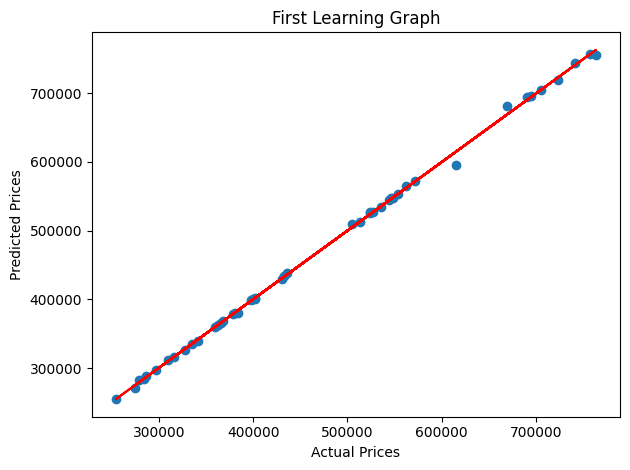

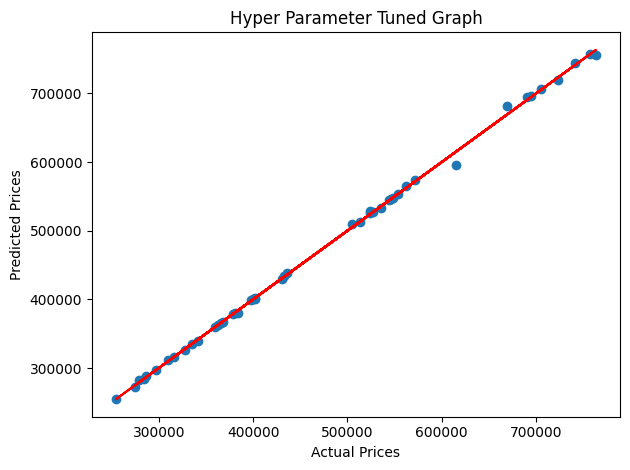

In [ ]:
# Fit a linear regression line to the data
# For the non-tuned actual vs predicted values
coefficients_non_tuned = np.polyfit(y_test, y_predict, 1)

# For the hyperparameter-tuned actual vs predicted values
coefficients_tuned = np.polyfit(y_test, final_pred, 1)

# Generate the regression lines
line_non_tuned = np.polyval(coefficients_non_tuned, y_test)
line_tuned = np.polyval(coefficients_tuned, y_test)

# Plot the non-tuned actual vs predicted values
plt.scatter(y_test, y_predict)
plt.plot(
    y_test,
    line_non_tuned,
    color='red',
    label='Regression Line'
    )
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('First Learning Graph')

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot to a dynamic SVG file
plt.savefig('firstGraph.svg', format='svg', bbox_inches='tight')

plt.show()


# plot hyperparamer tuned actual vs predicted
plt.scatter(y_test, final_pred)
plt.plot(
    y_test,
    line_tuned,
    color='red',
    label='Regression Line'
    )
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Hyper Parameter Tuned Graph')

# Adjust layout
plt.tight_layout()

# Save and show
plt.savefig('TunedGraph.svg', format='svg', bbox_inches='tight')

plt.show()

Try to predict next 10 years with new dataframe and trained/hyper tuned model

In [ ]:
# Create a dataset for future dates
future_dates = pd.date_range(start='2024-01-01', periods=120, freq='M')
future_data = pd.DataFrame({'Date': future_dates})

# Add the old data to the new set
future_data['Composite_HPI'] = dataset['Composite_HPI']
future_data['Single_Family_Benchmark'] = dataset['Single_Family_Benchmark']
future_data['One_Storey_Benchmark'] = dataset['One_Storey_Benchmark']
future_data['Two_Storey_Benchmark'] = dataset['Two_Storey_Benchmark']
future_data['Townhouse_Benchmark'] = dataset['Townhouse_Benchmark']
future_data['Apartment_Benchmark'] = dataset['Apartment_Benchmark']

print(future_data)

# Grab the older data and apply it to the same dataframe
features_for_prediction = future_data[[
    'Composite_HPI',
    'Single_Family_Benchmark',
    'One_Storey_Benchmark',
    'Two_Storey_Benchmark',
    'Townhouse_Benchmark',
    'Apartment_Benchmark'
    ]]

# Use the model to predict future prices
future_predictions = final_forest.predict(
      features_for_prediction
    )

# Add the predicted prices to the future_data DataFrame
future_data['Composite_Benchmark_Predicted'] = future_predictions

          Date  Composite_HPI  Single_Family_Benchmark  One_Storey_Benchmark  \
0   2024-01-31          100.0                 257600.0              205000.0   
1   2024-02-29          101.0                 260100.0              207400.0   
2   2024-03-31          102.1                 263000.0              210000.0   
3   2024-04-30          103.1                 265800.0              212700.0   
4   2024-05-31          103.8                 267500.0              214500.0   
..         ...            ...                      ...                   ...   
115 2033-08-31          168.2                 439200.0              337700.0   
116 2033-09-30          168.7                 440400.0              338400.0   
117 2033-10-31          168.9                 440800.0              338000.0   
118 2033-11-30          169.2                 441400.0              337000.0   
119 2033-12-31          169.1                 441900.0              336700.0   

     Two_Storey_Benchmark  Townhouse_Be

Plot the Predicted actual prices

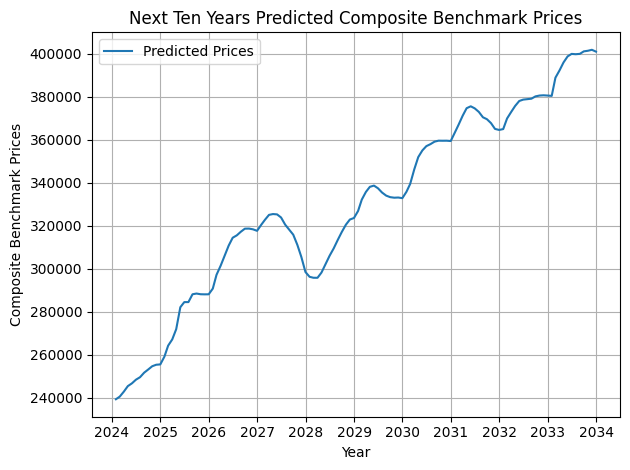

In [ ]:
# Plot the predicted Composite Benchmark prices over time
plt.plot(future_data['Date'], future_data['Composite_Benchmark_Predicted'], label='Predicted Prices')

# Set up the axis
plt.xlabel('Year')
plt.ylabel('Composite Benchmark Prices')
plt.title('Next Ten Years Predicted Composite Benchmark Prices')

# Make the graph look nice
plt.tight_layout()
plt.legend()
plt.grid(True)

# Save the graph for a rainy day
plt.savefig('PredictionGraph.svg', format='svg', bbox_inches='tight')

# Display the graph to the end user
plt.show()